In [2]:
import re
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
def sentimentFromEmotion(emotion):
    if emotion in pos:
        return 1
    elif emotion in neg:
        return -1

def plotFreq_bar(array):
    count = Counter(array)
    plt.bar(count.keys(), count.values())
    plt.show()

def getPolarity(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']

def makePolarityColumn(dataframe, emotion_col, polarity_col_name):
    dataframe[polarity_col_name] = dataframe[emotion_col].apply(getPolarity)
    
def lowerCase(text):
    return text.lower()

def removeStopwords(text):
    tokens = word_tokenize(text)
    cleaned = [token for token in tokens if token not in stopwords.words('english')]
    return " ".join(cleaned)

def clearUsernames(text):
    text = re.sub('@[^\s]+',' ',text)
    return text

In [4]:
df = pd.read_pickle('merged_training.pkl')

In [6]:
df.to_csv('4.1L_emotion_data.csv')

In [9]:
df.head()

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


In [10]:
%%time
df['text'] = df.text.apply(lowerCase) # for case uniformity

CPU times: user 181 ms, sys: 41.4 ms, total: 222 ms
Wall time: 267 ms


In [11]:
%%time
df['text'] = df.text.apply(clearUsernames) # for noise reduction

CPU times: user 563 ms, sys: 12.8 ms, total: 576 ms
Wall time: 608 ms


In [12]:
%%time
df['text'] = df.text.apply(removeStopwords) # for noise reduction

CPU times: user 17min 58s, sys: 4min 37s, total: 22min 35s
Wall time: 23min 14s


In [15]:
df['emotions'].unique()

array(['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
      dtype=object)

In [21]:
pos = ['joy', 'love', 'surprise']
neg = ['sadness', 'fear',]

In [22]:
%%time
df['sentiment'] = df['emotions'].apply(sentimentFromEmotion)

CPU times: user 153 ms, sys: 13 ms, total: 166 ms
Wall time: 174 ms


In [24]:
%%time
makePolarityColumn(df, 'emotions', 'polarity')

CPU times: user 47min 50s, sys: 26 s, total: 48min 16s
Wall time: 49min 2s


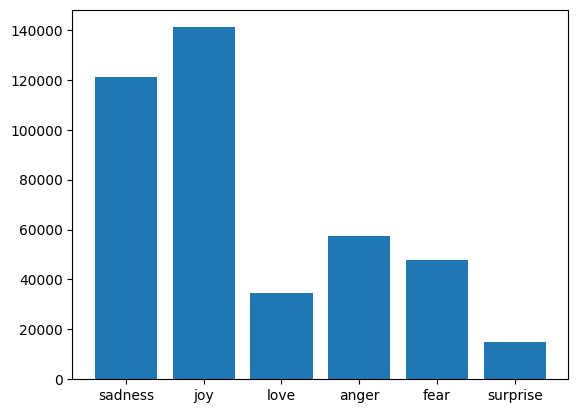

In [25]:
plotFreq_bar(df.emotions)

In [26]:
df.head()

,text,emotions,sentiment,polarity
27383,feel awful job get position succeed happen,sadness,-1.0,-0.4404
110083,im alone feel awful,sadness,-1.0,-0.4404
140764,ive probably mentioned really feel proud actua...,joy,1.0,0.5859
100071,feeling little low days back,sadness,-1.0,-0.4404
2837,beleive much sensitive peoples feelings tend c...,love,1.0,0.6369


In [28]:
positive_df = df.loc[df['polarity'] > 0]
negative_df = df.loc[df['polarity'] < 0]
neutral_df  = df.loc[df['polarity'] == 0]

In [30]:
positive_df.emotions.unique() # to check if any negative or neutral emotions creeped in

array(['joy', 'love', 'surprise'], dtype=object)

In [32]:
negative_df.emotions.unique() # to check if any positive or neutral emotions creeped in

array(['sadness', 'anger', 'fear'], dtype=object)

In [33]:
df.to_csv('4.1LCleaned.csv')